

**Title: Forecasting Market Trends**

**Author**: [Haruna Jallow](https://www.https://www.linkedin.com/in/haruna-jallow-3b17901b7/)\
**Date**: 26.May.2024\
`**Dataset**: [Market related](Datasets where given to me by Mentorness for my Mentorness Internship Progrom)

**`About Me:** : My name is Haruna Jallow, I am a MSc Data Sicence Candidate and i am currently taking one month Internship with Mentorness Group from Indai ."With a solid foundation in Data Science and over three years of hands-on experience, I excel in leveraging data to streamline business operations and enhance efficiency. Proficient in Python, SQL, R, and LaTeX, I bring robust skills in data visualization, predictive modelling, and strategic analysis. My background as a youth activist and leader has sharpened my administrative skills and reinforced my commitment to institutional goals. I am passionate about transforming data into compelling stories that inform strategies and solutions, ensuring data becomes a cornerstone of actionable insights and strategic direction. Join me in exploring the intersection of technology and data, unlocking new horizons in data-driven innovation!"


## **Supervised Machine Learning on Market Trend Forecasting**

# Task

Develop a robust time series machine learning model capable of accurately forecasting market trends based on historical data dataset given to me by Mentorness Internship Program as an Intern of the program.

Data Preprocessing: Cleaning the dataset, handling missing values, and encoding categorical variables.


Exploratory Data Analysis (EDA): Analyzing the temporal patterns, identifying seasonality, trends, and anomalies within the data. 
Feature Engineering: Creating relevant features such as lagged variables, rolling statistics, and seasonal indicators
. 
Model Selection and Training: Evaluating various time series forecasting models such as ARIMA, SARIMA, Prophet, and LSTM, selecting the most suitable one, and training it on the datas
et.
Model Evaluation: Assessing the model's performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMS
E). 
Fine-tuning and Validation: Fine-tuning the model parameters, validating its performance on unseen data, and iterating if necess

The ultimate goal is to develop a robust predictive model to predict the quantity and prices of commodities for future months, empowering stakeholders to make proactive decisions regarding production, procurement, pricing strategies, and resource allocation.ary.



# Libraries And Utilities

In [1]:
## Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

# libraries used for mathematical operations
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from pmdarima import auto_arima
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
#from keras.preprocessing.sequence import TimeseriesGenerator
#from fbprophet import Prophet

from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
#from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore') 

# Load Data

In [2]:
df = pd.read_csv('MarketPricePrediction.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


# Data Cleanring
Let's explore the missing values, trend, seasonality, correlation and noise in the data.

In [4]:
#Descripción de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [5]:
# Checking missing values
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
df.shape

(10227, 10)

In [8]:
def label_encode_columns(df, columns):
    """
    Apply label encoding to specified columns of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list of str): The list of column names to be label encoded.
    
    Returns:
    pd.DataFrame: The DataFrame with label encoded columns.
    """
    label_encoder = LabelEncoder()
    for column in columns:
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    return df

# Assume df is your DataFrame and you want to label encode 'city', 'market', and 'state'
columns_to_encode = ['city', 'market', 'state']
df = label_encode_columns(df, columns_to_encode)

In [9]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%B-%Y')
df.set_index('date', inplace=True)

In [10]:
# Dropping the original 'city' and 'state' columns with other irrelevant coluns for now
df.drop(['city', 'state', 'market', 'month', 'year'], axis=1, inplace=True)

# Printing the encoded DataFrame
df.head()

,quantity,priceMin,priceMax,priceMod,city_encoded,market_encoded,state_encoded
date,,,,,,,
2005-01-01,2350,404,493,446,0,0,16
2006-01-01,900,487,638,563,0,0,16
2010-01-01,790,1283,1592,1460,0,0,16
2011-01-01,245,3067,3750,3433,0,0,16
2012-01-01,1035,523,686,605,0,0,16


# Exploratory Data Analysis (EDA)

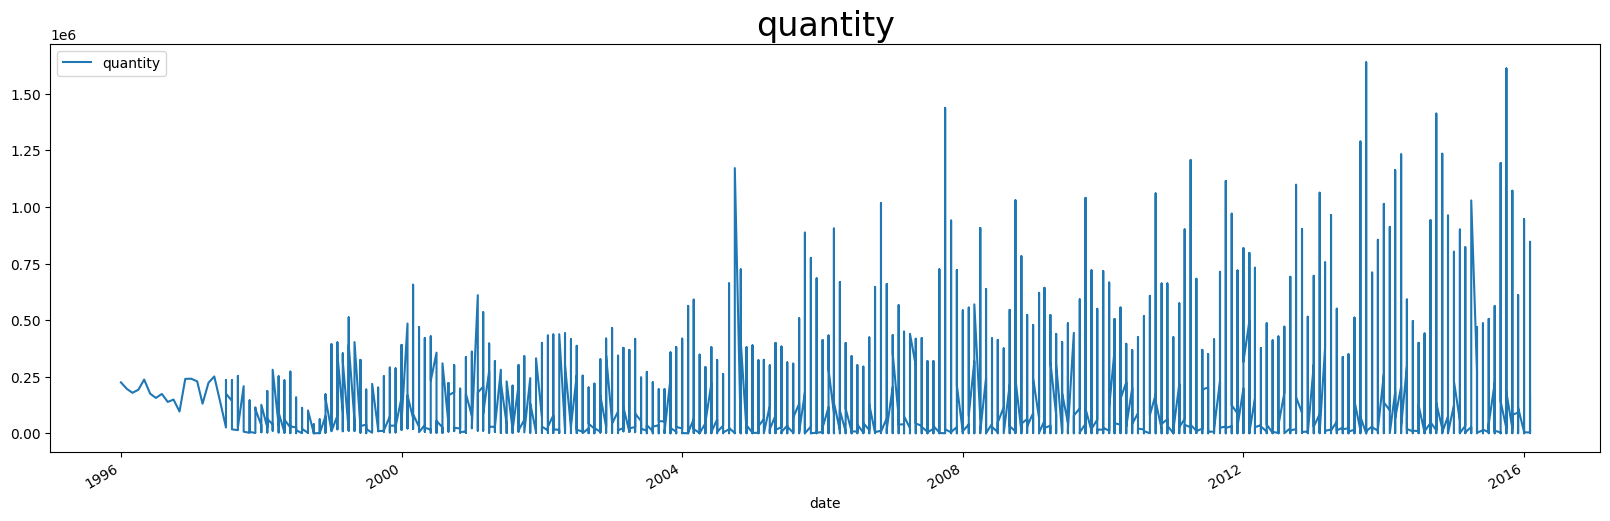

In [11]:
ax = df[['quantity']].plot(figsize=(20, 6))
ax.set_title('quantity', fontsize=24);

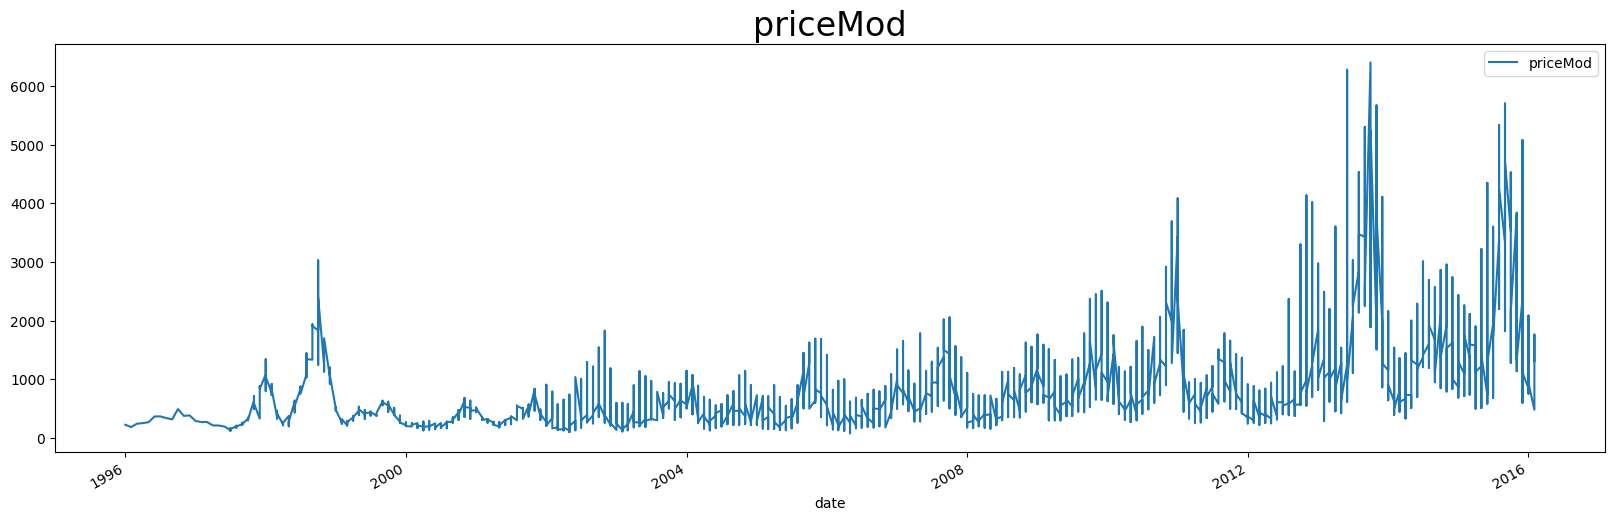

In [12]:
ax = df[['priceMod']].plot(figsize=(20, 6))
ax.set_title('priceMod', fontsize=24);

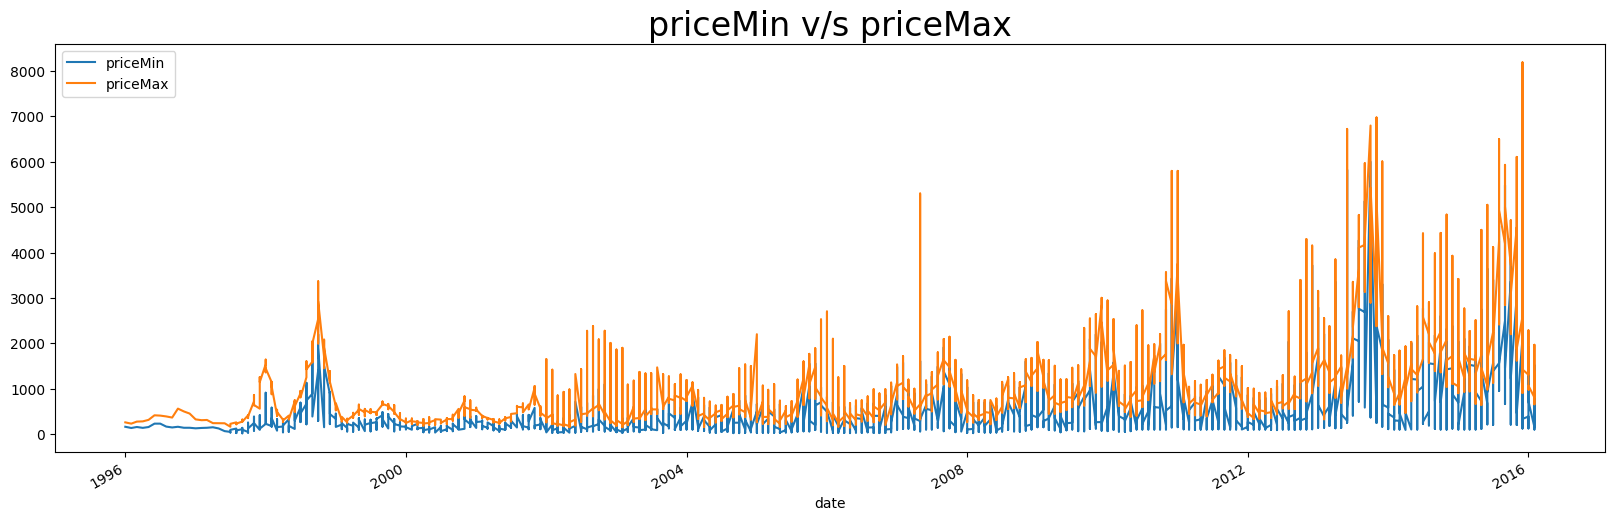

In [13]:
ax = df[['priceMin', 'priceMax']].plot(figsize=(20, 6))
ax.set_title('priceMin v/s priceMax', fontsize=24);

The quantity of the commodity traded or available showed an increase trend growth during the period. 

And most frequently occurring price of the commodity during the month is from 2012 to 2016.

Text(0.5, 1.0, 'End of year quantity for the commodity')

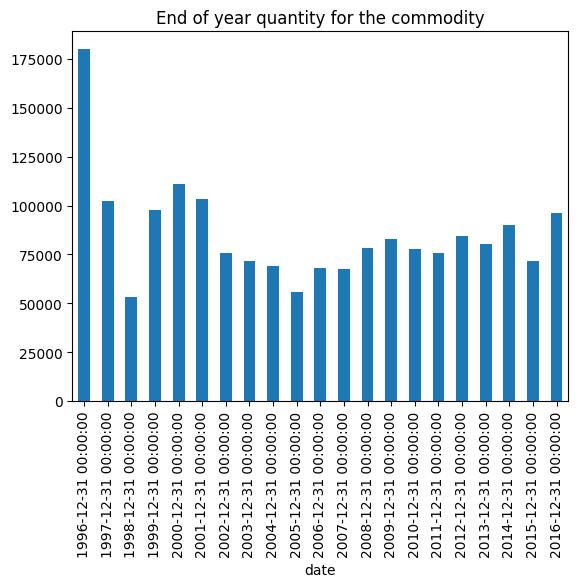

In [14]:
df['quantity'].resample('A').mean().plot(kind='bar')
plt.title('End of year quantity for the commodity')

Text(0.5, 1.0, 'End of year priceMod for the market')

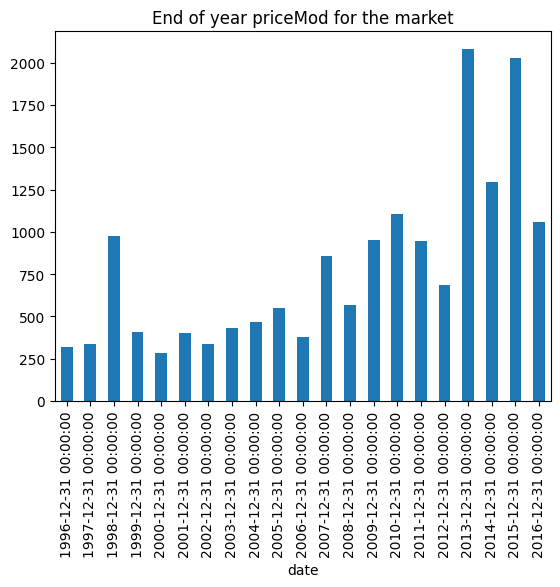

In [15]:
df['priceMod'].resample('A').mean().plot(kind='bar')
plt.title('End of year priceMod for the market')

Text(0.5, 1.0, 'Yearly Mean priceMin for the market')

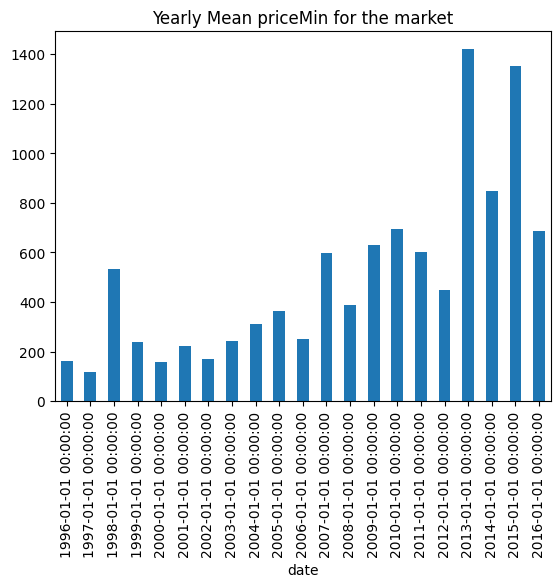

In [16]:
df['priceMin'].resample('AS').mean().plot(kind='bar')
plt.title('Yearly Mean priceMin for the market')

Text(0.5, 1.0, 'Monthly Mean 2010 quantity comodidate for the market')

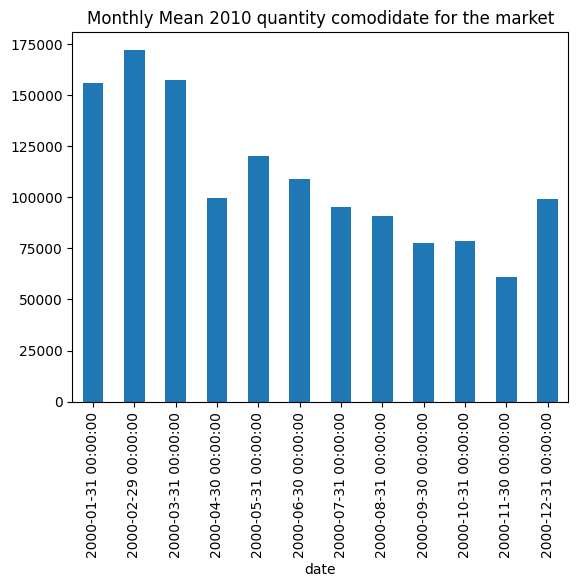

In [17]:
df['quantity']['2000'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2010 quantity comodidate for the market')

Text(0.5, 1.0, 'Monthly Mean 2010 quantity comodidate for the market')

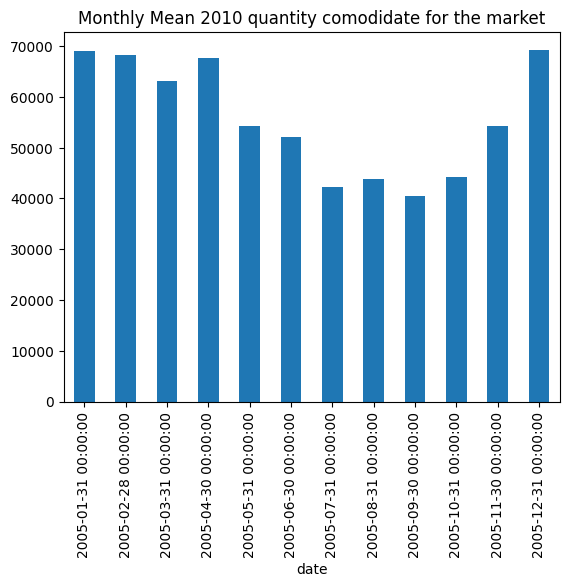

In [18]:
df['quantity']['2005'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2010 quantity comodidate for the market')

Text(0.5, 1.0, 'Monthly Mean 2010 quantity comodidate for the market')

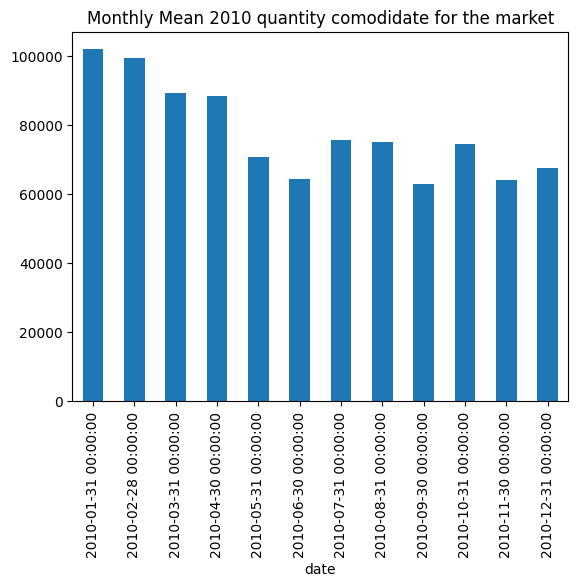

In [19]:
df['quantity']['2010'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2010 quantity comodidate for the market')

Text(0.5, 1.0, 'Monthly Mean 2010 quantity comodidate for the market')

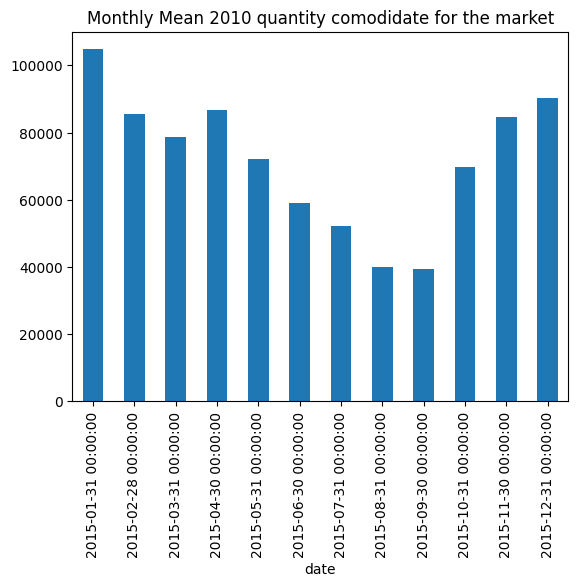

In [20]:
df['quantity']['2015'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2010 quantity comodidate for the market')

The quantity of the commodity traded or available has decreased on average in a decade(2000-2015).

Box-Cox Transformation - to generate a uniform distribution.

Lambda: 0.108490


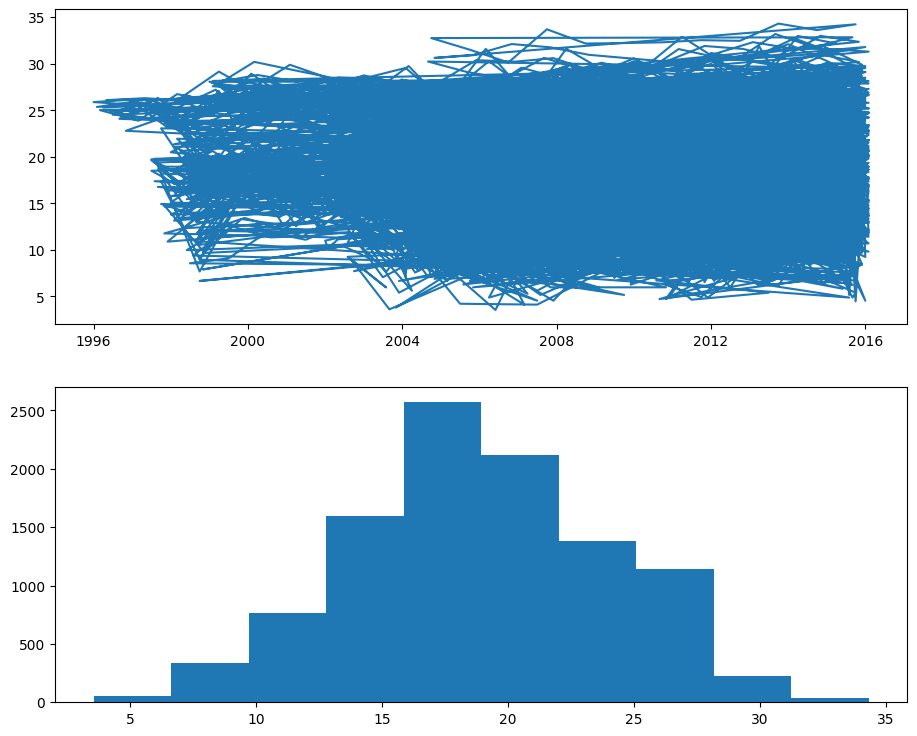

In [21]:
df['quantity_boxcox'],lam = boxcox(df['quantity'])
print('Lambda: %f' % lam)
rcParams['figure.figsize'] = 11, 9
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(df['quantity_boxcox'])
# histogram
plt.subplot(212)
plt.hist(df['quantity_boxcox'])
plt.show()

# Moving average smoothing
Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.

By plotting rolling

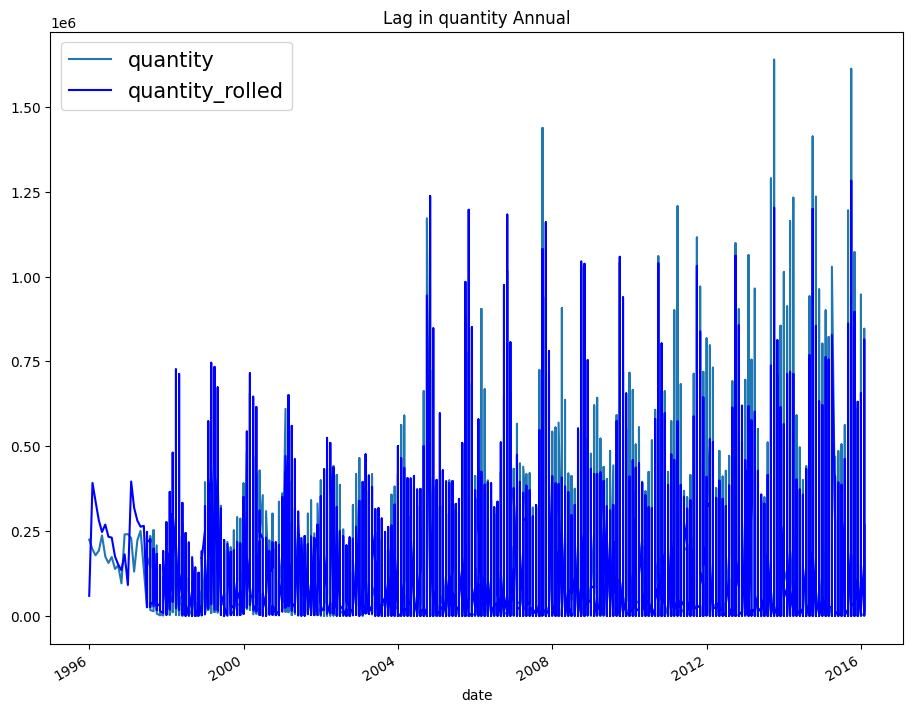

In [22]:
rolling_vwap = df['quantity'].rolling(window=7)
df['quantity_rolled'] = rolling_vwap.mean()
df['quantity'].plot() 
df['quantity_rolled'].plot(color='blue')
plt.title('Lag in quantity Annual')
plt.legend(fontsize=15)
plt.show()

# Autocorrelation plot

Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
 "Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot..." - *Introduction to Time Series Forecasting With Python*, Jason Brownlee.

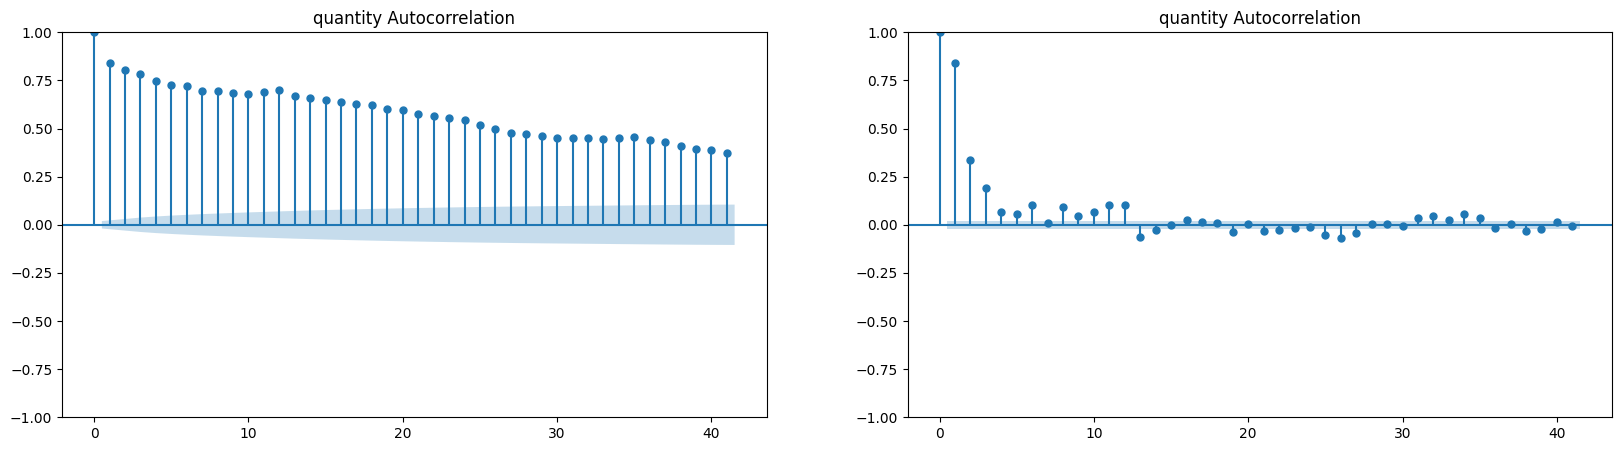

In [23]:
#Autocorrelación simple y parcial serie producción cerveza
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_acf(df['quantity'], ax=ax[0], title="quantity Autocorrelation")
plot_pacf(df['quantity'], ax=ax[1], title="quantity Autocorrelation")
plt.show()

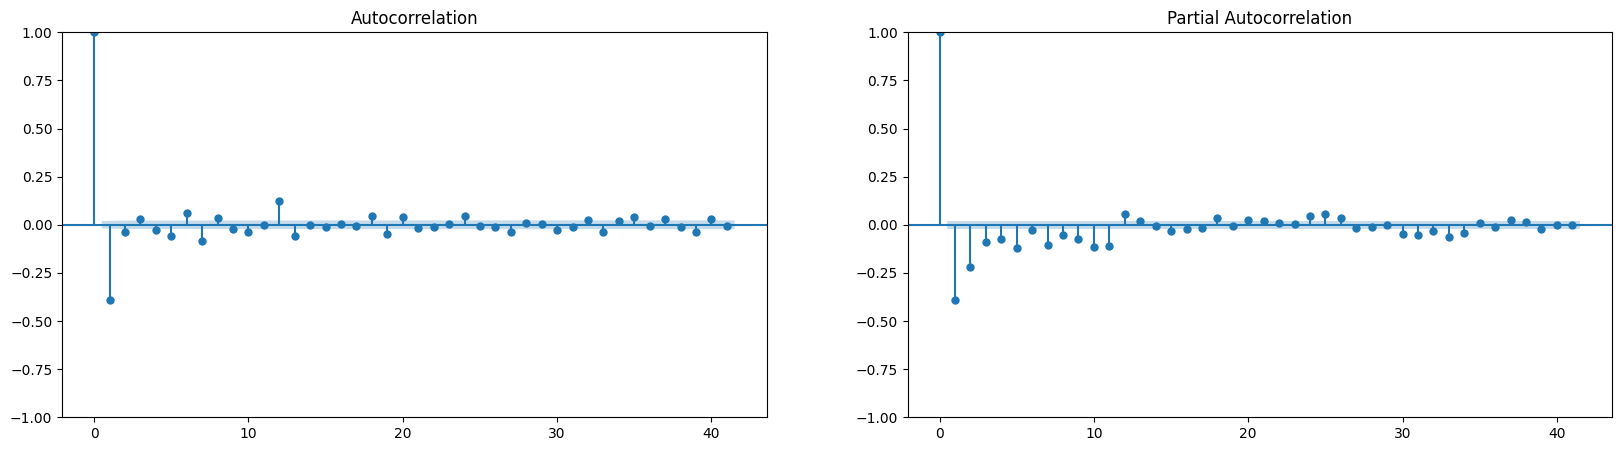

In [24]:
#Autocorrelación simple y parcial primera diferencia de serie producción cerveza
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_acf(df['quantity'].diff().iloc[1:], ax=ax[0])
plot_pacf(df['quantity'].diff().iloc[1:], ax=ax[1])
plt.show()

# Stationarity-
We'll check with the Augmented Dickey-Fuller test for stationarity in the dataset. A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

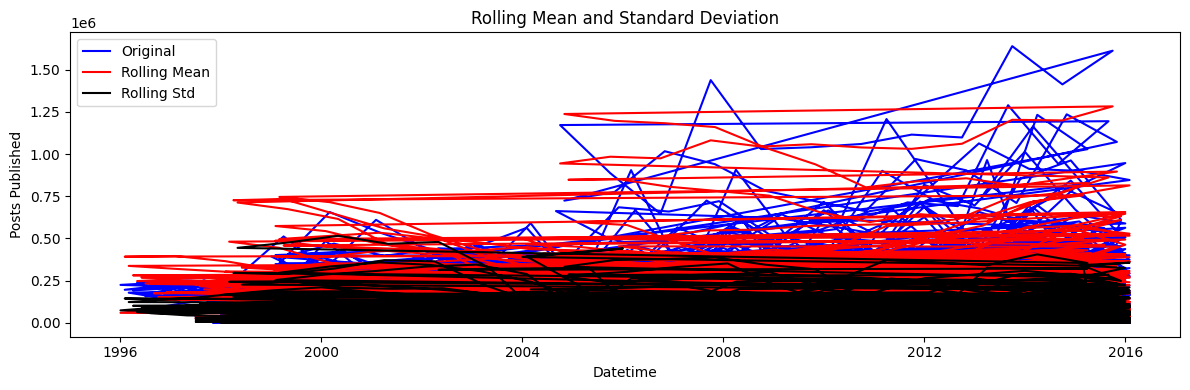

Results of Dickey-Fuller Test:
Test Statistic                -8.568350e+00
P-Value                        8.327455e-14
#Lags Used                     3.800000e+01
Number of Observations Used    1.018800e+04
Critical Value (1%)           -3.430992e+00
Critical Value (5%)           -2.861824e+00
Critical Value (10%)          -2.566921e+00
dtype: float64


In [25]:
# Creating a function to check stationarity of the given data
def check_stationarity(data):
    # Determining rolling statistics
    rol_mean = data.rolling(7).mean() #7 days in a week
    rol_std = data.rolling(7).std()
    
    # Plotting rolling statistics
    plt.figure(figsize=(12, 4))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rol_mean, color='red', label='Rolling Mean')
    plt.plot(rol_std, color='black', label='Rolling Std')
    plt.xlabel('Datetime')
    plt.ylabel('Posts Published')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Performing Dickey-Fuller test
    results = adfuller(data)
    df_output = pd.Series(results[:4], index=['Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used'])
    for key, value in results[4].items():
        df_output[f'Critical Value ({key})'] = value
    print(f'Results of Dickey-Fuller Test:\n{df_output}')
    
# Stationarity check of our daily time series
check_stationarity(df['quantity'])

As the test statistic is more than the critical values, we can say that the time series is non-stationary. Result shows a reduce in stationarity as p-value is small and test statistic is less than the critical values. Thus, the data is is stationary as p-value<0.05.

# Decompose Time Series Data
> "Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting."- *Introduction to Time Series Forecasting With Python*, Jason Brownlee.




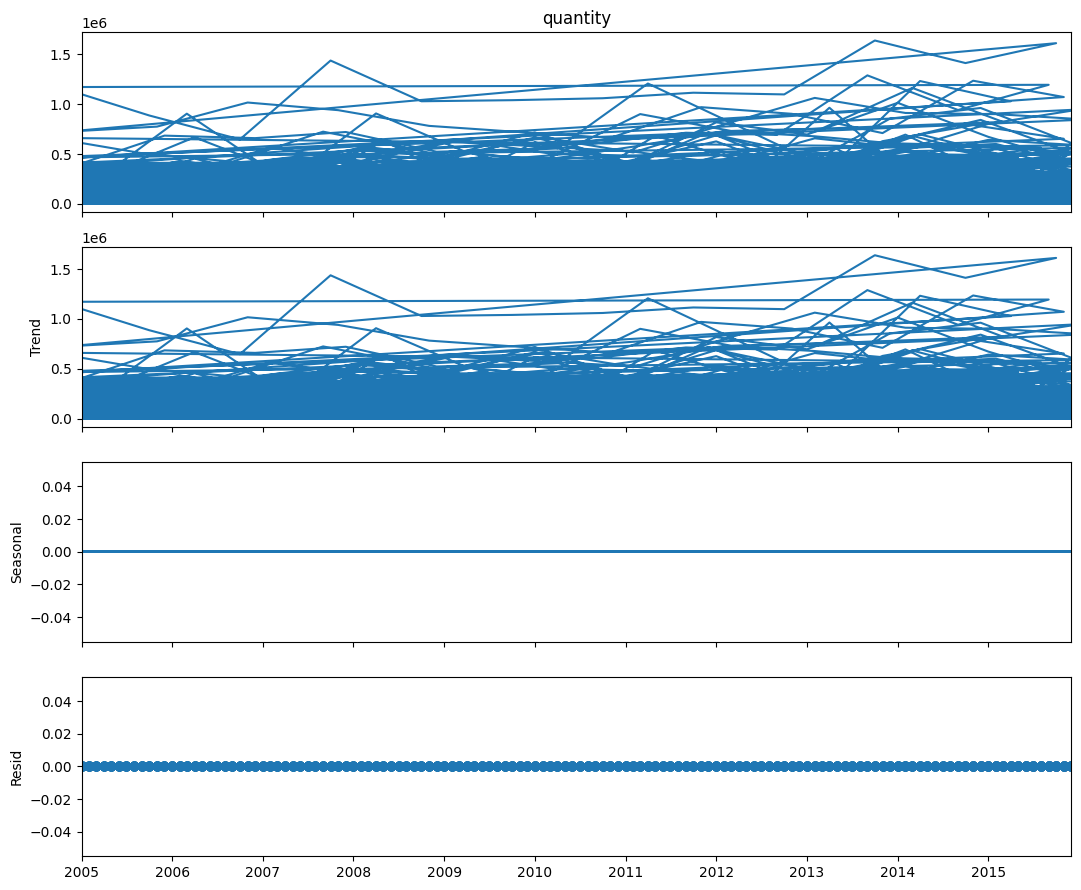

In [26]:
series = df['quantity']
result = seasonal_decompose(series, model='additive', period=1) 
rcParams['figure.figsize'] = 11, 9
result.plot()
plt.show()

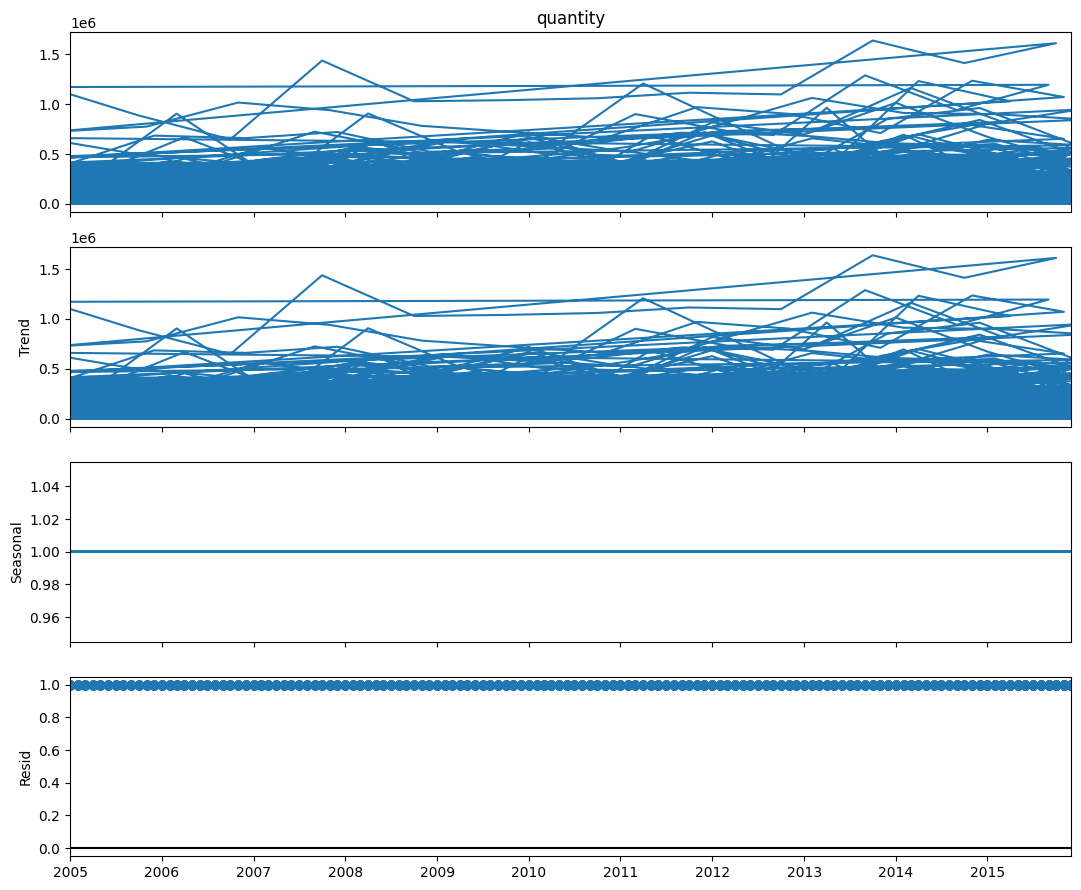

In [27]:
series = df['quantity']
result = seasonal_decompose(series, model='multiplicative', period=1) 
rcParams['figure.figsize'] = 11, 9
result.plot()
plt.show()

In [28]:
df2 = df.copy()
df2.head()

,quantity,priceMin,priceMax,priceMod,city_encoded,market_encoded,state_encoded,quantity_boxcox,quantity_rolled
date,,,,,,,,,
2005-01-01,2350,404,493,446,0,0,16,12.178823,NaN
2006-01-01,900,487,638,563,0,0,16,10.062978,NaN
2010-01-01,790,1283,1592,1460,0,0,16,9.792215,NaN
2011-01-01,245,3067,3750,3433,0,0,16,7.524709,NaN
2012-01-01,1035,523,686,605,0,0,16,10.357551,NaN


# Feature Engineering:
Appling sliding window statistic on columns to obtain lag values, to be used in modelling the dataset. The mean and standard lag values of the features will be useful to forcast out of sample or test sample of 'Numeric_col'. 

In [29]:
df2.reset_index(drop=False,inplace=True)
lag_features = ["priceMin", "priceMax", "priceMod", 'market_encoded']
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df2[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df2[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df2[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df2[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df2[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df2[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df2[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df2[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df2[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df2.fillna(df.mean(), inplace=True)

df2.set_index("date", drop=False, inplace=True)
df2.head()

,date,quantity,priceMin,priceMax,priceMod,city_encoded,market_encoded,state_encoded,quantity_boxcox,quantity_rolled,...,priceMod_mean_lag30,priceMod_std_lag3,priceMod_std_lag7,priceMod_std_lag30,market_encoded_mean_lag3,market_encoded_mean_lag7,market_encoded_mean_lag30,market_encoded_std_lag3,market_encoded_std_lag7,market_encoded_std_lag30
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,2005-01-01,2350,404,493,446,0,0,16,12.178823,76591.489133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01,2006-01-01,900,487,638,563,0,0,16,10.062978,76591.489133,...,446.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2010-01-01,2010-01-01,790,1283,1592,1460,0,0,16,9.792215,76591.489133,...,504.5,82.731491,82.731491,82.731491,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01,2011-01-01,245,3067,3750,3433,0,0,16,7.524709,76591.489133,...,823.0,554.751282,554.751282,554.751282,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01,2012-01-01,1035,523,686,605,0,0,16,10.357551,76591.489133,...,1475.5,1468.232422,1381.372925,1381.372925,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df2['date'] = pd.to_datetime(df2['date'], format='%B-%Y')
df2["month"] = df2['date'].dt.month
df2["day"] = df2['date'].dt.day

In [31]:
df2.drop(['date'], axis=1, inplace=True)

# Preparing model 
Note: The additional features supplied to time series problems are called exogenous regressors.

In [32]:
# Assuming df2 is your DataFrame
df2.dropna(axis =0,inplace=True)
#Dropping NULL or infinite values to avoid errors.
df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df2=df2.resample('MS').sum()
# Split the data into training and validation sets
df_train = df2[df2.index < "2013"]
df_valid = df2[df2.index >= "2013"]

# Extract the exogenous features
exogenous_features = [
    "priceMin_mean_lag3", "priceMin_std_lag3", "priceMax_mean_lag3", "priceMax_std_lag3", "priceMod_mean_lag3", "priceMod_std_lag3",
    "priceMin_mean_lag7", "priceMin_std_lag7", "priceMax_mean_lag7", "priceMax_std_lag7", "priceMod_mean_lag7", "priceMod_std_lag7",
    "priceMin_mean_lag30", "priceMin_std_lag30", "priceMax_mean_lag30", "priceMax_std_lag30", "priceMod_mean_lag30", "priceMod_std_lag30",
    "market_encoded_mean_lag30", "market_encoded_std_lag30", "month", "day"
]

In [33]:
print(f'Shape: Train={df_train.shape}, Validation={df_valid.shape}')

Shape: Train=(204, 35), Validation=(38, 35)


# ARIMA Models
An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

In [34]:
from pmdarima.arima import auto_arima
arima = auto_arima(df_train.quantity, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
arima.fit(df_train.quantity, exogenous=df_train[exogenous_features])
print(arima.summary())
forecast = arima.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5956.746, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5949.380, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5950.116, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5950.121, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5947.765, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5952.079, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.617 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2972.883
Date:                Mon, 27 May 2024   AIC                           5947.765
Time:                        11:37:44   BIC                           5951.079
Sample:                    01-01-1996   HQIC                          5949.106
          

<Axes: xlabel='date'>

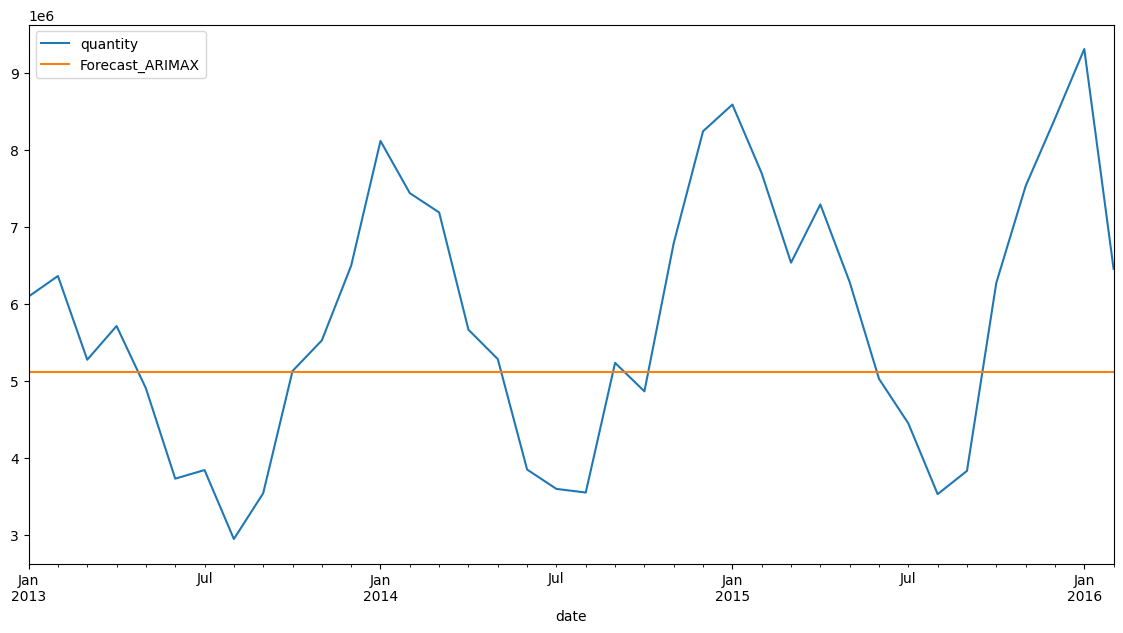

In [35]:
df_valid[["quantity", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

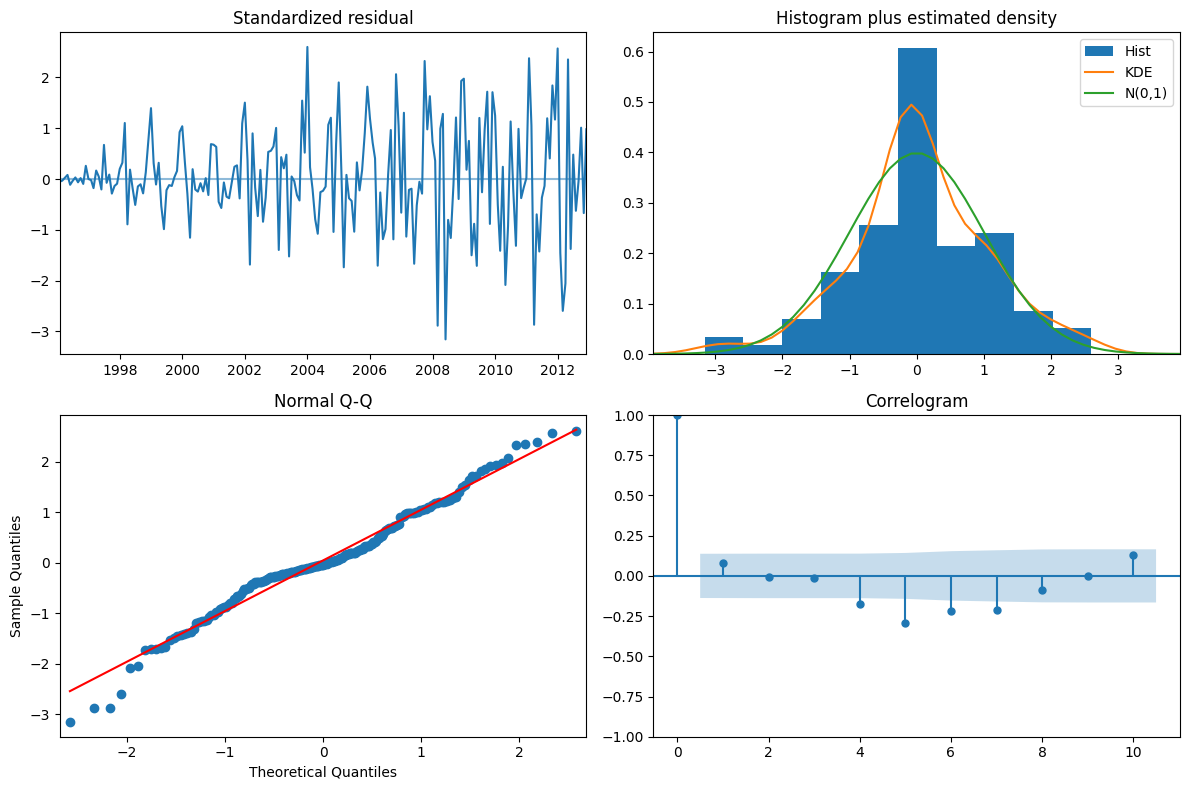

In [36]:
# Residual Plots
arima.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

Above plots show that the residual errors are approximately normally distributed, but the mean is slightly deviating to the left from zero signifying bias in prediction. Moreover, correlogram indicates that some lags are still autocorrelated; especially, the lag 7 which signifies a weekly seasonality. Therefore, we'll add seasonality components to see if it accounts for these inconsistencies.
Before doing that, let us evaluate the performance of the ARIMA model on validation set.

In [37]:
# Calculate the MAE, MSE, R2 and RMSE
arima_rmse = np.sqrt(mean_squared_error(df_valid["quantity"], df_valid["Forecast_ARIMAX"]))
arima_mae = mean_absolute_error(df_valid["quantity"], df_valid["Forecast_ARIMAX"])
arima_mse = mean_squared_error(df_valid["quantity"], df_valid["Forecast_ARIMAX"])
arima_score = r2_score(df_valid["quantity"], df_valid["Forecast_ARIMAX"])

# Print the results
print("MAE Score of Prophet model = ", arima_rmse)
print("MSE Score of Prophet model = ", arima_mae)
print("RMSE Score of Prophet model =  ", arima_mse)
#print("R2 Score of Prophet model = ", arima_score)

MAE Score of Prophet model =  1795850.3167900934
MSE Score of Prophet model =  1469970.7105263157
RMSE Score of Prophet model =   3225078360315.079


In [38]:
comparision = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MSE'])

In [39]:
comparision.loc[0] = ['ARIMA', arima_rmse, arima_mae, arima_mse]
comparision

,Model,RMSE,MAE,MSE
0,ARIMA,1.795850e+06,1.469971e+06,3.225078e+12


ARIMA models give a fair rmse and mae score. Let's see if deep learning models can do a better job in fitting to our dataset.

# SARIMA Model
Let us determine whether adding seasonal components improves performance on our data.

In [40]:
# Fit the SARIMA model with seasonal parameters
sarima = auto_arima(
    df_train['quantity'],
    exogenous=df_train[exogenous_features],
    seasonal=True,
    m=12,  # Assuming monthly seasonality, change if different
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)
# Fit the model
sarima.fit(df_train['quantity'], exogenous=df_train[exogenous_features])
print(sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5916.887, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5949.380, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5939.937, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5943.801, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5947.765, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5935.236, Time=0.71 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=5932.861, Time=0.82 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=5913.444, Time=3.06 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=5919.274, Time=1.51 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5912.845, Time=2.38 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5924.608, Time=1.64 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=5922.281, Time=1.02 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=5921.899, Time=1.15 sec
 ARIMA(3,1,2)(1,0,2)[12]

In [41]:
# Make predictions
forecast_sarima = sarima.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_SARIMAX"] = forecast_sarima

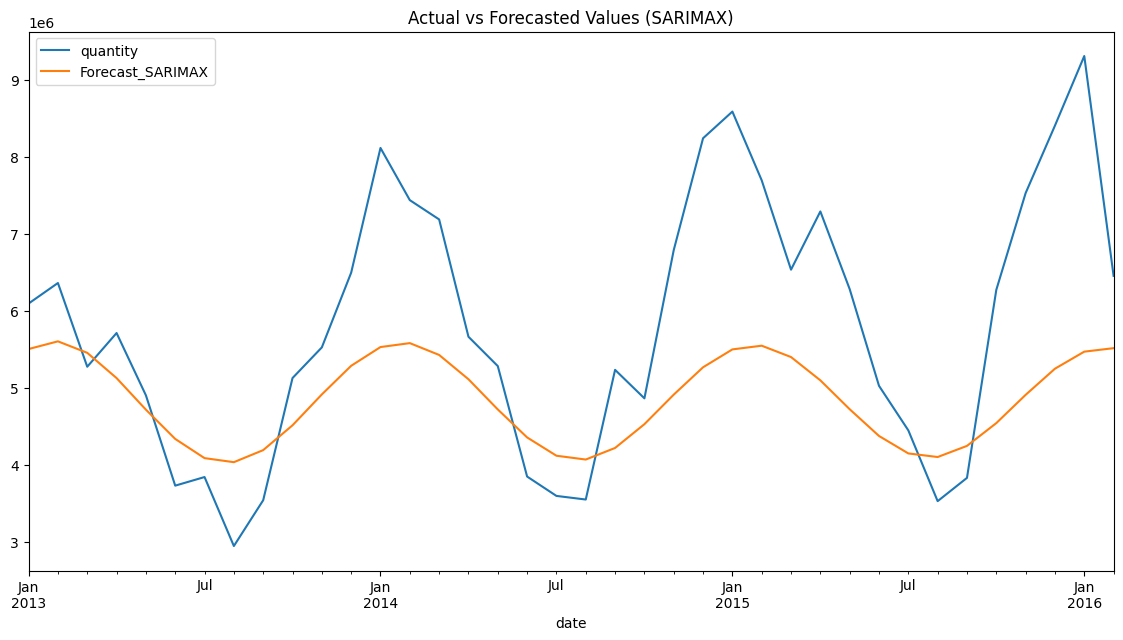

In [42]:
# Plot the actual vs forecasted values
df_valid[["quantity", "Forecast_SARIMAX"]].plot(figsize=(14, 7))
plt.title('Actual vs Forecasted Values (SARIMAX)')
plt.show()

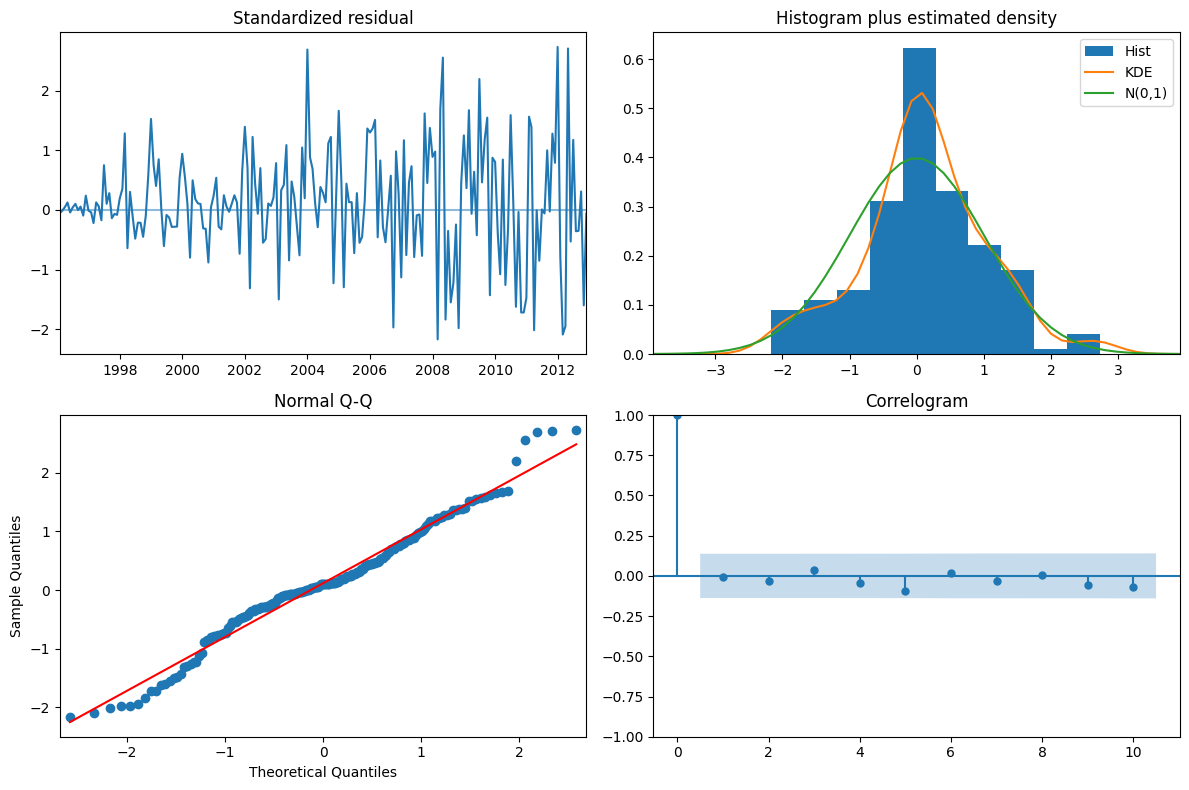

In [45]:
# Residual diagnostics
sarima.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

Above plots show that residual errors are almost normally distributed. The mean of the distribution is also close to zero, and there is no autocorrelation with the lags. This makes the model a good fit.

In [43]:
# Calculate the MAE, MSE, R2 and RMSE
sarima_rmse = np.sqrt(mean_squared_error(df_valid["quantity"], df_valid["Forecast_SARIMAX"]))
sarima_mae = mean_absolute_error(df_valid["quantity"], df_valid["Forecast_SARIMAX"])
sarima_mse = mean_squared_error(df_valid["quantity"], df_valid["Forecast_SARIMAX"])
sarima_score = r2_score(df_valid["quantity"], df_valid["Forecast_SARIMAX"])

# Print the results
print("MAE Score of Prophet model = ", sarima_rmse)
print("MSE Score of Prophet model = ", sarima_mae)
print("RMSE Score of Prophet model =  ", sarima_mse)
#print("R2 Score of Prophet model = ", sarima_score)

MAE Score of Prophet model =  1563267.8124377232
MSE Score of Prophet model =  1229897.87599112
RMSE Score of Prophet model =   2443806253403.824


In [44]:
comparision.loc[1] = ['SARIMA', sarima_rmse, sarima_mae, sarima_mse]
comparision

,Model,RMSE,MAE,MSE
0,ARIMA,1.795850e+06,1.469971e+06,3.225078e+12
1,SARIMA,1.563268e+06,1.229898e+06,2.443806e+12


# Prophet Model
Let us determine how Prophet model works for our time series data.

In [45]:
# Preparing data for Prophet modelling
# Reset the index to use the datetime index as a column
df_train.reset_index(inplace=True)
df_valid.reset_index(inplace=True)

# Preparing data for Prophet modelling
train_df = df_train[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})
valid_df = df_valid[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})

In [46]:
# Adding exogenous features to the Prophet model
for feature in exogenous_features:
    train_df[feature] = df_train[feature].values
    valid_df[feature] = df_valid[feature].values

In [47]:
# Instantiate and fit the Prophet model
prophet = Prophet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=True, seasonality_mode='multiplicative')
for feature in exogenous_features:
    prophet.add_regressor(feature)

prophet.fit(train_df)

11:41:28 - cmdstanpy - INFO - Chain [1] start processing
11:41:28 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
# Create a DataFrame for future predictions including the exogenous features
future = valid_df[['ds'] + exogenous_features]

In [49]:
# Create a DataFrame for future predictions including the exogenous features
# Ensure that exogenous features are in the correct format
future = pd.DataFrame()
future['ds'] = valid_df['ds']
for feature in exogenous_features:
    future[feature] = pd.to_numeric(valid_df[feature], errors='coerce')

In [50]:
# Check for any NaN values in the exogenous features and handle them
if future.isnull().any().any():
    print("Warning: NaN values found in exogenous features. Filling NaNs with zeros.")
    future.fillna(0, inplace=True)

In [51]:
# Make predictions
predictions = prophet.predict(future)
valid_df["Forecast_Prophet"] = predictions['yhat']

In [52]:
# Print the first few rows of the predictions
print(valid_df[['ds', 'y', 'Forecast_Prophet']].head())

          ds        y  Forecast_Prophet
0 2013-01-01  6093993      6.614322e+06
1 2013-02-01  6360676      6.657886e+06
2 2013-03-01  5273390      5.926462e+06
3 2013-04-01  5711211      5.221084e+06
4 2013-05-01  4902357      5.236714e+06


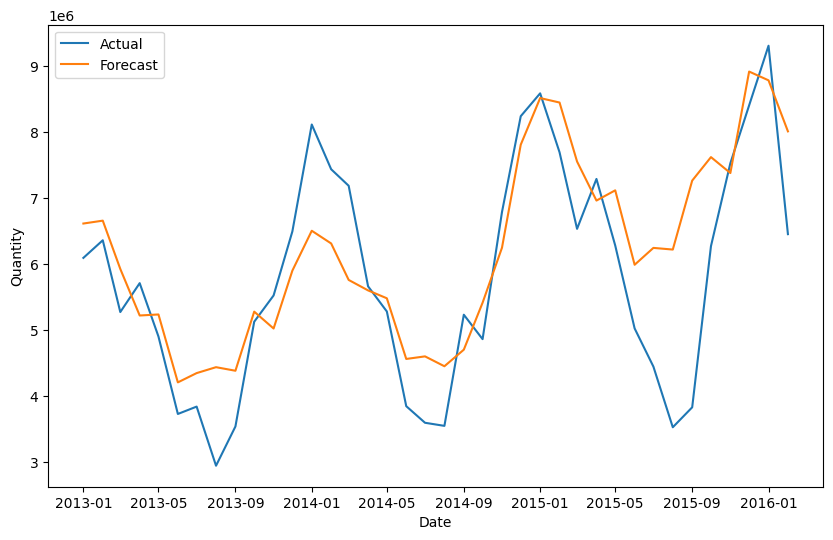

In [53]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(valid_df['ds'], valid_df['y'], label='Actual')
plt.plot(valid_df['ds'], valid_df['Forecast_Prophet'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [54]:
# Calculate the MAE, MSE, R2 and RMSE
prophet_rmse = np.sqrt(mean_squared_error(valid_df["y"], valid_df["Forecast_Prophet"]))
prophet_mae = mean_absolute_error(valid_df["y"], valid_df["Forecast_Prophet"])
prophet_mse = mean_squared_error(valid_df["y"], valid_df["Forecast_Prophet"])
prophet_score = r2_score(valid_df["y"], valid_df["Forecast_Prophet"])

# Print the results
print("MAE Score of Prophet model = ", prophet_rmse)
print("MSE Score of Prophet model = ", prophet_mae)
print("RMSE Score of Prophet model =  ", prophet_mse)
#print("R2 Score of Prophet model = ", prophet_score)

MAE Score of Prophet model =  1087654.5038978623
MSE Score of Prophet model =  840877.2743027201
RMSE Score of Prophet model =   1182992319849.305


In [55]:
comparision.loc[2] = ['PROPHET', prophet_rmse, prophet_mae, prophet_mse]
comparision

,Model,RMSE,MAE,MSE
0,ARIMA,1.795850e+06,1.469971e+06,3.225078e+12
1,SARIMA,1.563268e+06,1.229898e+06,2.443806e+12
2,PROPHET,1.087655e+06,8.408773e+05,1.182992e+12


# Deep Learning Models 
Let's explore some deep learning models on the dataset.
We'll try LTSM and RNN. RNN, a model designed for allowing information to persist in short term memory to predict subsequent values, should be best suited to our dataset, since we can see that autocorrelations don't show signs of seasonality, it tends to be manipulated by recent previous prices. We'll also apply LTSM, the special RNN model, which might reveal some interesting long term dependencies or relations in the dataset. Let's explore!


In [56]:
#Dataset with target variable and exogeneous features 
df3 = pd.DataFrame()
df3['quantity'] = df2['quantity']
for i in exogenous_features:
    df3[i] = df2[i]
print(pd.infer_freq(df3.index))

MS


In [57]:
df4=df3.copy()

In [58]:
dataset = df4.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
X_train = train[:,1:]
y_train = train[:,0]
X_test = test[:,1:]
y_test = test[:,0]

In [59]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (193, 22)
y_train.shape =  (193,)
X_test.shape =  (49, 22)
y_test.shape =  (49,)


In [60]:
timesteps = 1
units = 100
nb_epoch = 70

In [61]:
X_train = X_train.reshape(X_train.shape[0],timesteps,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],timesteps,X_test.shape[1])

In [62]:
lstm_model=Sequential()
lstm_model.add(LSTM(units,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(units,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(units,activation='tanh',return_sequences=False))
lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          49,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,101 (820.71 KB)

 Trainable params: 210,101 (820.71 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
lstm_model.compile(optimizer="adam",loss="MSE")
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data = (X_test, y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0996 - val_loss: 0.2141
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - val_loss: 0.0327
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0163 - val_loss: 0.0533
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - val_loss: 0.0285
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - val_loss: 0.0235
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 0.0275
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - val_loss: 0.0246
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - val_loss: 0.0188
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074 - val_loss: 0.0212
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - val_loss: 0.0171
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - val_loss: 0.0172
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066 - 

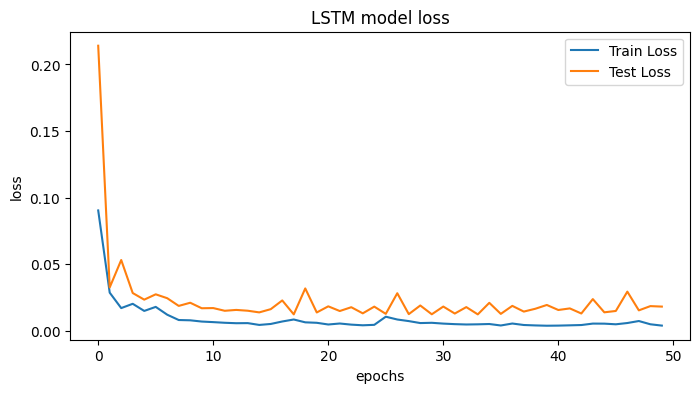

In [64]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [66]:
lstm_predictions = lstm_model.predict(X_test)

# Calculate the MAE, MSE, R2 and RMSE
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_score = r2_score(y_test, lstm_predictions)

# Print the results
print("MAE Score of Prophet model = ", lstm_rmse)
print("MSE Score of Prophet model = ", lstm_mae)
print("RMSE Score of Prophet model =  ", lstm_mse)
#print("R2 Score of Prophet model = ", lstm_score)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
MAE Score of Prophet model =  0.1531923
MSE Score of Prophet model =  0.12554257
RMSE Score of Prophet model =   0.023467882


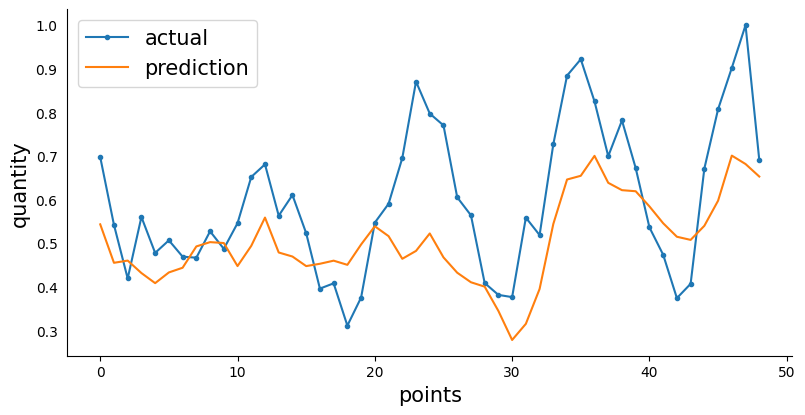

In [67]:
plt.figure(figsize=(8,4))
plt.plot(y_test, marker='.', label="actual")
plt.plot(lstm_predictions, label="prediction")
plt.tick_params(left=False, labelleft=True)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('quantity', size=15)
plt.xlabel('points', size=15)
plt.legend(fontsize=15)
plt.show();

In [68]:
comparision.loc[3] = ['LSTM', lstm_rmse, lstm_mae, lstm_mse]
comparision

,Model,RMSE,MAE,MSE
0,ARIMA,1.795850e+06,1.469971e+06,3.225078e+12
1,SARIMA,1.563268e+06,1.229898e+06,2.443806e+12
2,PROPHET,1.087655e+06,8.408773e+05,1.182992e+12
3,LSTM,1.531923e-01,1.255426e-01,2.346788e-02


# Model Comparison
Let us now compare performance of all the models we applied so far.

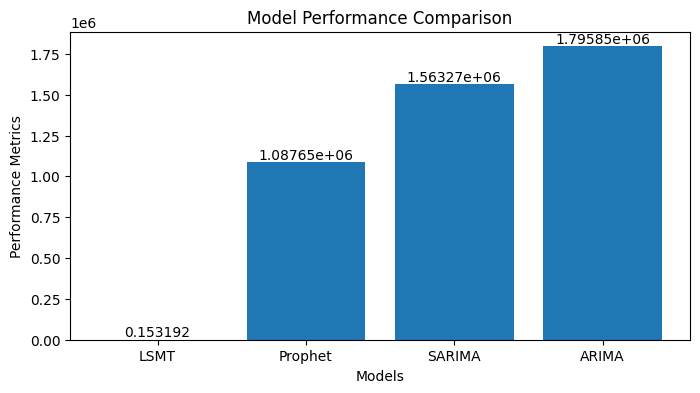

In [69]:
# Comparing Model Performances
perf = pd.DataFrame({'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSMT'],
                     'RMSE': [arima_rmse, sarima_rmse, prophet_rmse, lstm_rmse],
                     'MAE': [arima_mae, sarima_mae, prophet_mae, lstm_mae],
                     'MSE': [arima_mse, sarima_mse, prophet_mse, lstm_mse]})

perf.sort_values(by=['RMSE', 'MAE', 'MSE'], inplace=True)

# Plotting model performances
plt.figure(figsize=(8, 4))
vbar = plt.bar(perf.Model, perf.RMSE)
plt.bar_label(vbar)
plt.xlabel('Models')
plt.ylabel('Performance Metrics')
plt.title('Model Performance Comparison')
plt.show()


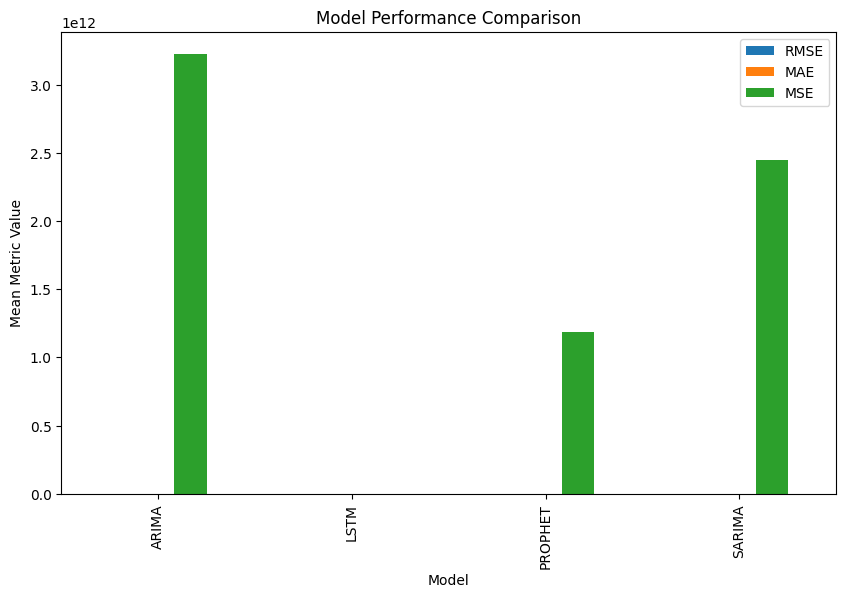

In [70]:
mean_metrics = comparision.groupby('Model').mean()

# Specify a colormap for the plot
colors = plt.cm.tab10.colors

mean_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Metric Value')
plt.show()

# Conclusion

Based on the RMSE and MAE, PROPHET appears to be the best-performing model. It has the lowest values for both metrics, indicating it makes more accurate predictions with smaller errors compared to ARIMA, SARIMA, and LSTM. Why PROPHET Performs the Best: PROPHET is specifically designed for time series forecasting with strong seasonality and multiple seasonalities, making it well-suited for datasets with such characteristics. It can handle missing data and outliers effectively, which may contribute to its better performance compared to traditional methods like ARIMA and SARIMA.
PROPHET automatically handles holidays and events that can influence the time series, adding more accuracy to the predictions.y.


Note on LSTM: While the LSTM model shows very low values for RMSE and MAE, these are likely normalized values, as deep learning models typically output predictions on a normalized scale. Thus, its performance should be compared in the context of the specific dataset and scaling used.

Final Recommendation: Based on RMSE and MAE, the PROPHET model is recommended for this time series forecasting task. If the scaled metrics are considered, a more detailed comparison in the appropriate context (considering normalization) would be necessary.


# Model Interpretation

The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.

# LSTM

In [84]:
# Prepare and scale the data
dataset = df4.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

X_train = train[:,1:]
y_train = train[:,0]
X_test = test[:,1:]
y_test = test[:,0]

In [85]:
timesteps = 1
units = 100
nb_epoch = 70
batch_size = 16
dropout_rate = 0.15

In [86]:
X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

In [87]:
def create_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, activation='tanh', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, activation='tanh', return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss="MSE")
    return model

In [88]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return rmse, mae, mse, r2, predictions

In [89]:
# Fine-tuning the LSTM model
best_rmse = float("inf")
best_units = units
best_dropout_rate = dropout_rate
best_model = None

In [90]:
for units in [50, 100, 150]:
    for dropout_rate in [0.1, 0.15, 0.2]:
        print(f"Training with units={units}, dropout_rate={dropout_rate}")
        model = create_model(units, dropout_rate)
        history = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
        
        rmse, mae, mse, r2, predictions = evaluate_model(model, X_test, y_test)
        print(f"RMSE: {rmse}, MAE: {mae}, MSE: {mse}, R2: {r2}")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_units = units
            best_dropout_rate = dropout_rate
            best_model = model


Training with units=50, dropout_rate=0.1
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
RMSE: 0.16286008059978485, MAE: 0.13077238202095032, MSE: 0.026523407548666, R2: 0.04831743078881223
Training with units=50, dropout_rate=0.15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000018A0F61E200> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━

In [91]:
print(f"Best RMSE: {best_rmse} with units={best_units} and dropout_rate={best_dropout_rate}")

Best RMSE: 0.12447121739387512 with units=150 and dropout_rate=0.1


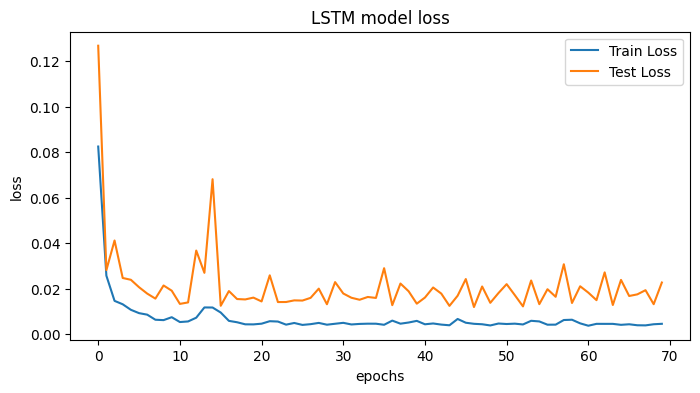

In [92]:
# Plotting the training history of the best model
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [93]:
# Final evaluation of the best model
rmse, mae, mse, r2, predictions = evaluate_model(best_model, X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


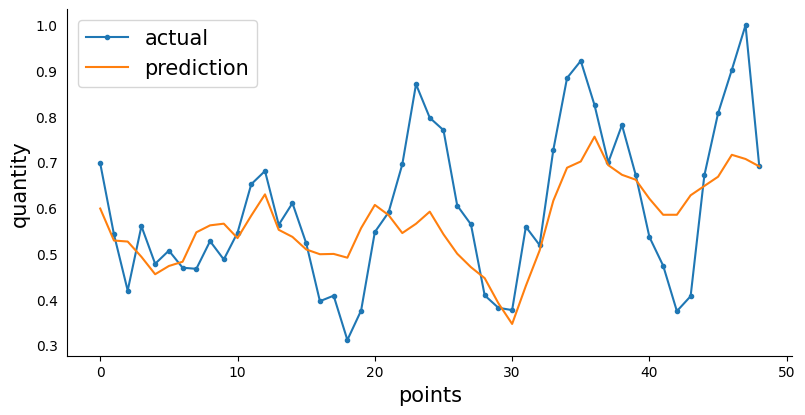

In [94]:
# Plotting actual vs predicted values
plt.figure(figsize=(8,4))
plt.plot(y_test, marker='.', label="actual")
plt.plot(predictions, label="prediction")
plt.tick_params(left=False, labelleft=True)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('quantity', size=15)
plt.xlabel('points', size=15)
plt.legend(fontsize=15)
plt.show()

In [95]:
# Print the final results
print("Final MAE Score of LSTM model = ", mae)
print("Final MSE Score of LSTM model = ", mse)
print("Final RMSE Score of LSTM model =  ", rmse)
print("Final R2 Score of LSTM model = ", r2)

Final MAE Score of LSTM model =  0.0957732
Final MSE Score of LSTM model =  0.015493084
Final RMSE Score of LSTM model =   0.12447122
Final R2 Score of LSTM model =  0.44409488789077234


# Prophet Model

In [97]:
# Reset the index to use the datetime index as a column
df_train.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)

# Prepare the data for Prophet
train_df = df_train[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})
valid_df = df_valid[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})

In [98]:
# Add exogenous features to the Prophet model
for feature in exogenous_features:
    train_df[feature] = df_train[feature].values
    valid_df[feature] = df_valid[feature].values

In [99]:
# Function to fine-tune and evaluate Prophet model
def evaluate_prophet(train_df, valid_df, exogenous_features, params):
    # Instantiate and fit the Prophet model
    prophet = Prophet(**params)
    for feature in exogenous_features:
        prophet.add_regressor(feature)
    prophet.fit(train_df)

    # Create a DataFrame for future predictions including the exogenous features
    future = valid_df[['ds'] + exogenous_features]

    # Ensure that exogenous features are in the correct format
    for feature in exogenous_features:
        future[feature] = pd.to_numeric(valid_df[feature], errors='coerce')

    # Check for any NaN values in the exogenous features and handle them
    if future.isnull().any().any():
        print("Warning: NaN values found in exogenous features. Filling NaNs with zeros.")
        future.fillna(0, inplace=True)

    # Make predictions
    predictions = prophet.predict(future)
    valid_df["Forecast_Prophet"] = predictions['yhat']

    # Calculate performance metrics
    prophet_rmse = np.sqrt(mean_squared_error(valid_df["y"], valid_df["Forecast_Prophet"]))
    prophet_mae = mean_absolute_error(valid_df["y"], valid_df["Forecast_Prophet"])
    prophet_mse = mean_squared_error(valid_df["y"], valid_df["Forecast_Prophet"])
    prophet_r2 = r2_score(valid_df["y"], valid_df["Forecast_Prophet"])

    # Print the results
    print("Prophet Model Performance:")
    print(f"RMSE: {prophet_rmse}")
    print(f"MAE: {prophet_mae}")
    print(f"MSE: {prophet_mse}")
    print(f"R²: {prophet_r2}")

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(valid_df['ds'], valid_df['y'], label='Actual')
    plt.plot(valid_df['ds'], valid_df['Forecast_Prophet'], label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

    return prophet_rmse, prophet_mae, prophet_mse, prophet_r2

In [100]:
# Define initial parameters for Prophet
initial_params = {
    'weekly_seasonality': True,
    'daily_seasonality': False,
    'yearly_seasonality': True,
    'seasonality_mode': 'multiplicative',
    'changepoint_prior_scale': 0.05,  # Default value, can be fine-tuned
    'seasonality_prior_scale': 10.0,  # Default value, can be fine-tuned
}


23:00:48 - cmdstanpy - INFO - Chain [1] start processing
23:00:48 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1087654.5038978623
MAE: 840877.2743027201
MSE: 1182992319849.305
R²: 0.569945706253931


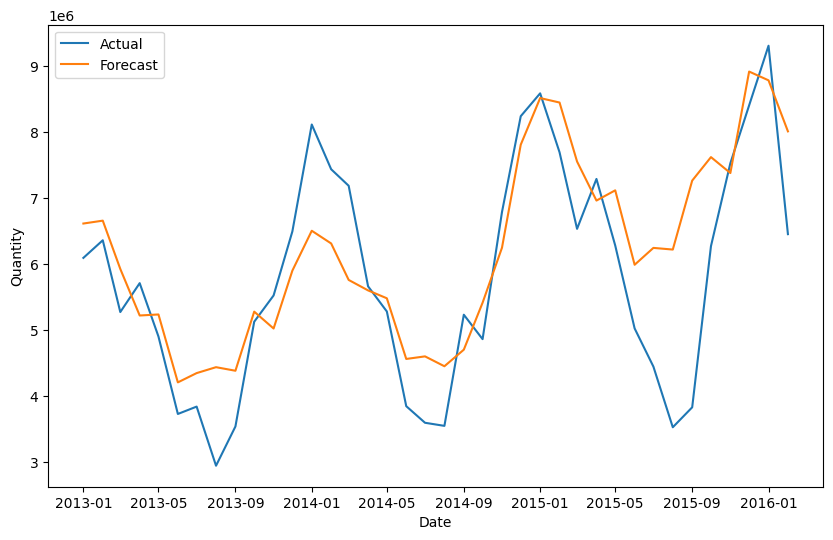

In [101]:
# Evaluate the initial model
rmse, mae, mse, r2 = evaluate_prophet(train_df, valid_df, exogenous_features, initial_params)

In [102]:
# Fine-tune the parameters by iterating over different values
best_rmse = rmse
best_params = initial_params.copy()

Testing params: changepoint_prior_scale=0.01, seasonality_prior_scale=1.0


23:01:01 - cmdstanpy - INFO - Chain [1] start processing
23:01:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1810522.3811736777
MAE: 1431795.923091543
MSE: 3277991292730.804
R²: -0.19165121078781433


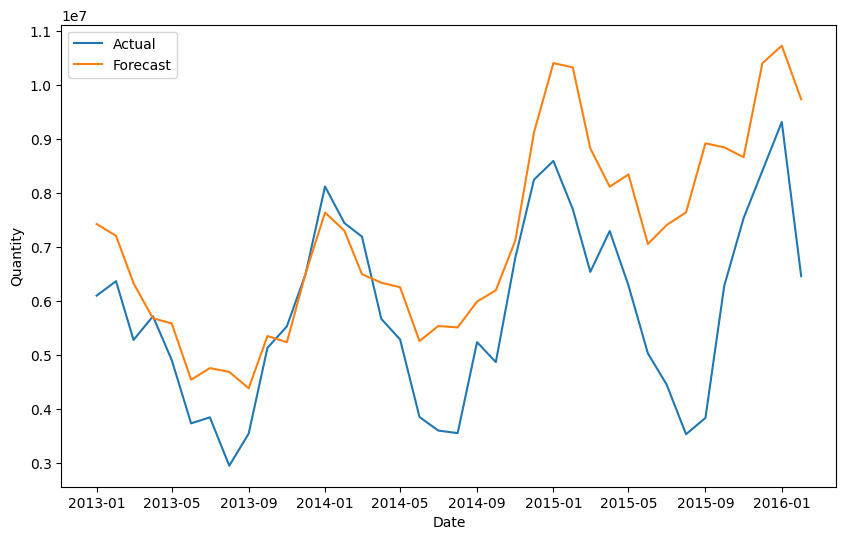

Testing params: changepoint_prior_scale=0.01, seasonality_prior_scale=10.0


23:01:03 - cmdstanpy - INFO - Chain [1] start processing
23:01:03 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1788628.9986349603
MAE: 1409511.3271182112
MSE: 3199193694757.9004
R²: -0.16300584701280663


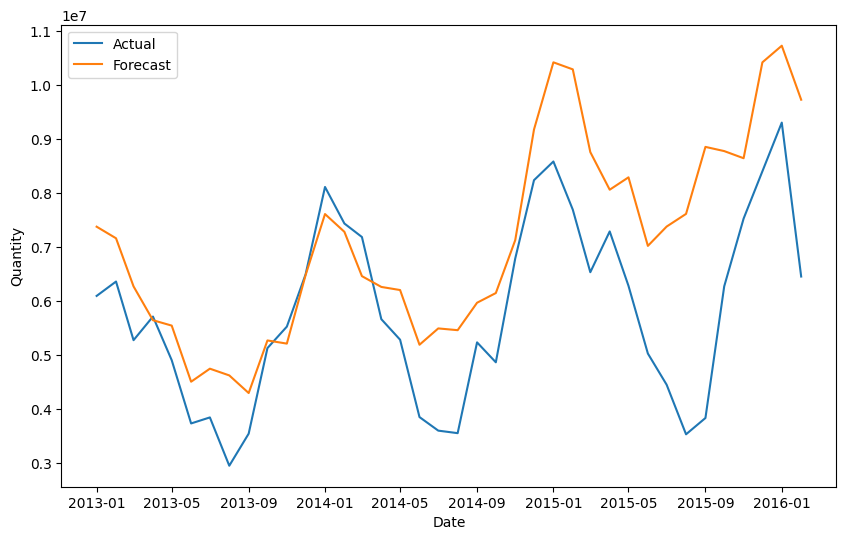

Testing params: changepoint_prior_scale=0.01, seasonality_prior_scale=20.0


23:01:04 - cmdstanpy - INFO - Chain [1] start processing
23:01:04 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1789394.0545212766
MAE: 1410475.1788054882
MSE: 3201931082356.0938
R²: -0.1640009720618012


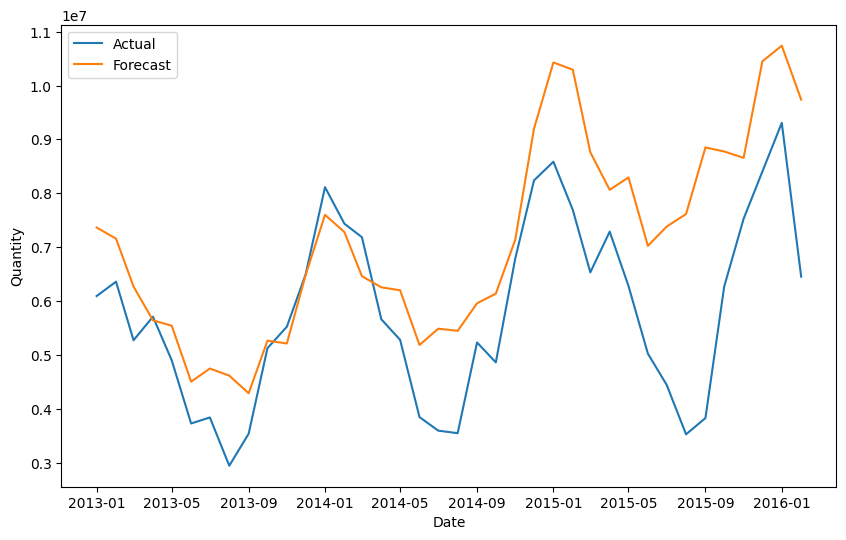

Testing params: changepoint_prior_scale=0.05, seasonality_prior_scale=1.0


23:01:05 - cmdstanpy - INFO - Chain [1] start processing
23:01:05 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1064628.489262003
MAE: 817800.6588119731
MSE: 1133433820148.295
R²: 0.5879617535523172


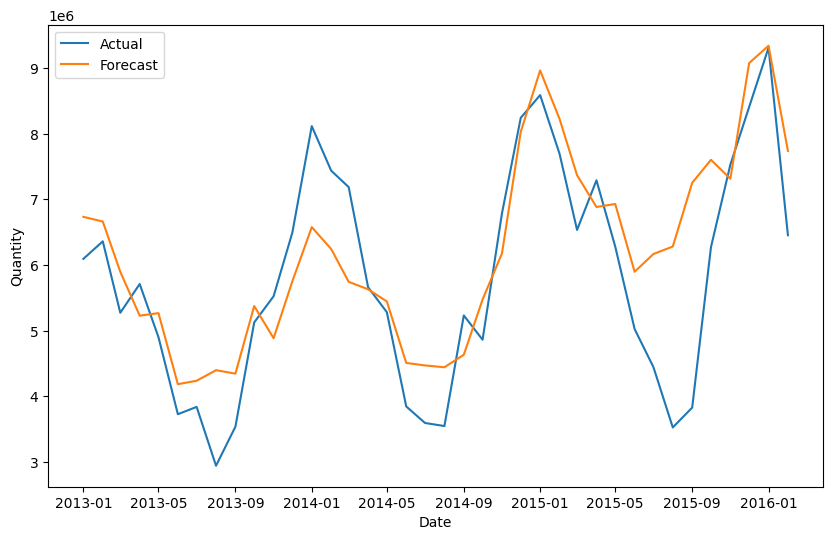

Testing params: changepoint_prior_scale=0.05, seasonality_prior_scale=10.0


23:01:06 - cmdstanpy - INFO - Chain [1] start processing
23:01:06 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1087654.5038978623
MAE: 840877.2743027201
MSE: 1182992319849.305
R²: 0.569945706253931


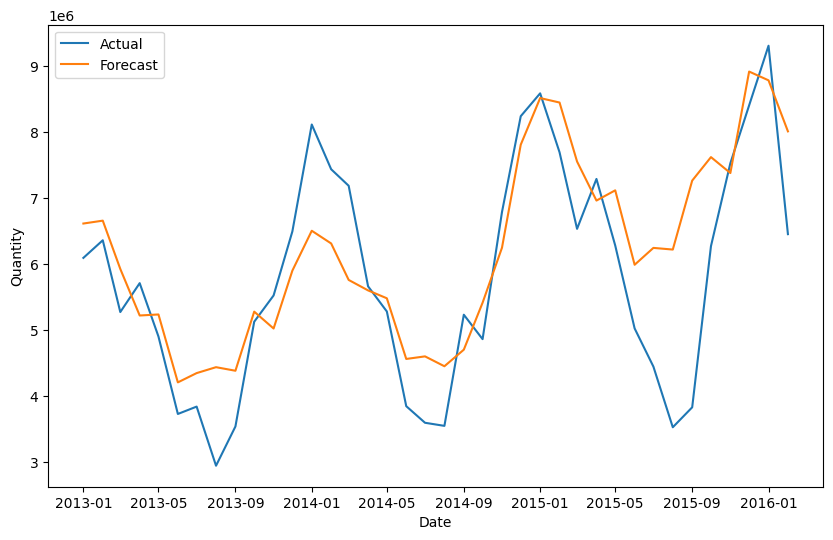

Testing params: changepoint_prior_scale=0.05, seasonality_prior_scale=20.0


23:01:07 - cmdstanpy - INFO - Chain [1] start processing
23:01:07 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 1086531.12487763
MAE: 839993.4049998488
MSE: 1180549885327.8481
R²: 0.5708336067377482


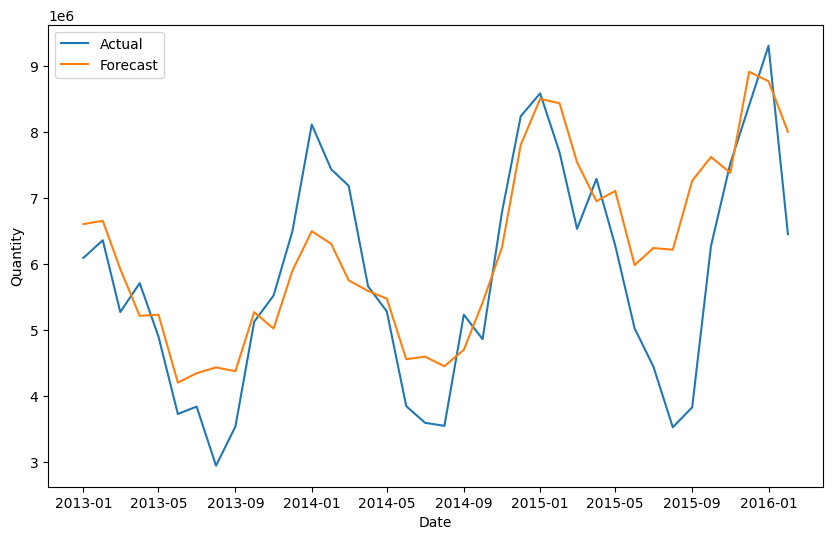

Testing params: changepoint_prior_scale=0.1, seasonality_prior_scale=1.0


23:01:07 - cmdstanpy - INFO - Chain [1] start processing
23:01:08 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 968402.655985172
MAE: 735502.1725130244
MSE: 937803704119.1355
R²: 0.6590793508289409


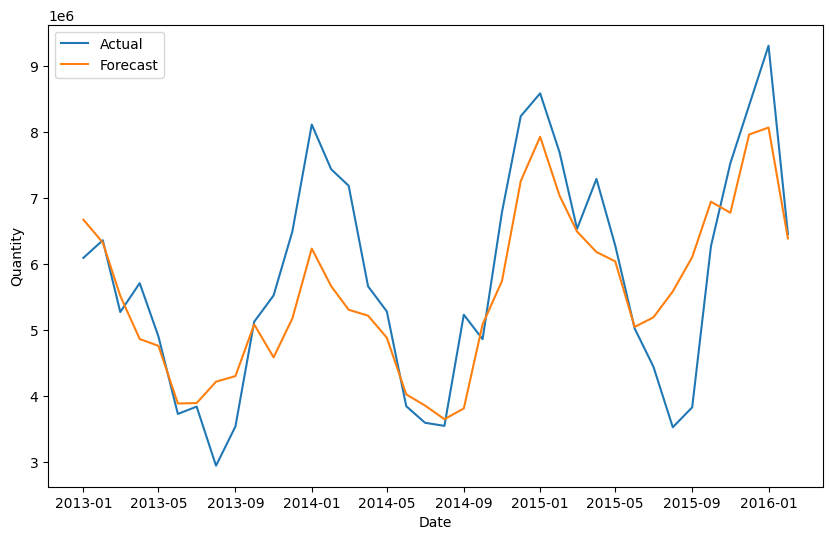

Testing params: changepoint_prior_scale=0.1, seasonality_prior_scale=10.0


23:01:08 - cmdstanpy - INFO - Chain [1] start processing
23:01:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 982659.3059055668
MAE: 750430.3687948986
MSE: 965619311482.8102
R²: 0.64896751732065


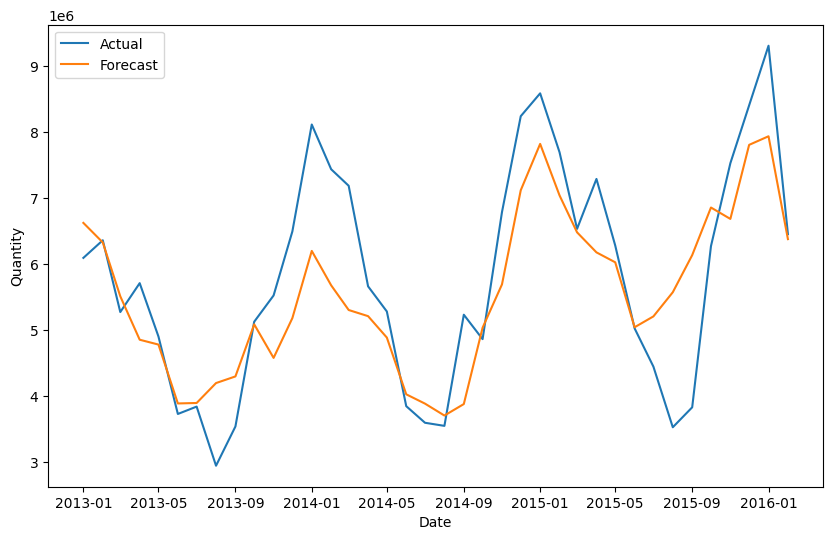

Testing params: changepoint_prior_scale=0.1, seasonality_prior_scale=20.0


23:01:09 - cmdstanpy - INFO - Chain [1] start processing
23:01:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Performance:
RMSE: 983615.924559902
MAE: 749692.7382085159
MSE: 967500287047.8308
R²: 0.6482837245313007


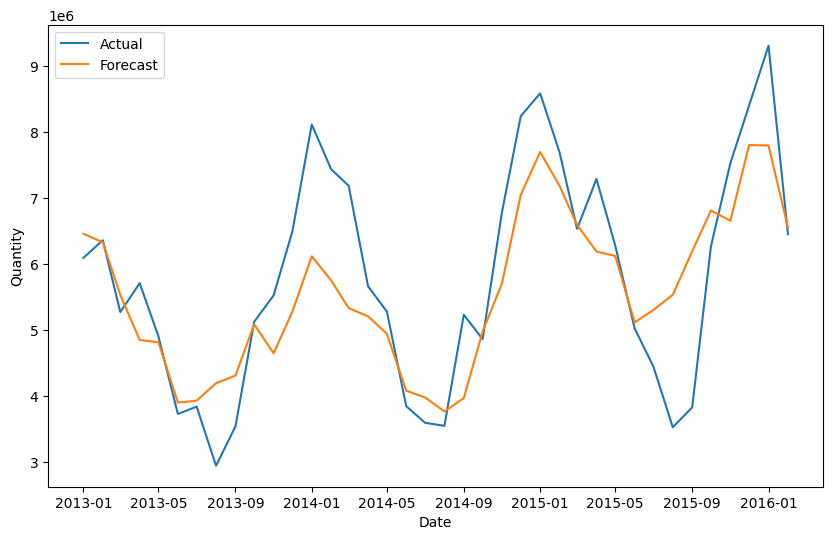

Best RMSE: 968402.655985172
Best Params: {'weekly_seasonality': True, 'daily_seasonality': False, 'yearly_seasonality': True, 'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}


In [103]:
# Example of fine-tuning changepoint_prior_scale and seasonality_prior_scale
for changepoint_prior_scale in [0.01, 0.05, 0.1]:
    for seasonality_prior_scale in [1.0, 10.0, 20.0]:
        params = initial_params.copy()
        params['changepoint_prior_scale'] = changepoint_prior_scale
        params['seasonality_prior_scale'] = seasonality_prior_scale

        print(f"Testing params: changepoint_prior_scale={changepoint_prior_scale}, seasonality_prior_scale={seasonality_prior_scale}")
        rmse, mae, mse, r2 = evaluate_prophet(train_df, valid_df, exogenous_features, params)

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = params
            
print("Best RMSE:", best_rmse)
print("Best Params:", best_params)

In [104]:
# Train the final model on the entire dataset with the best parameters
df_full = pd.concat([df_train, df_valid]).reset_index(drop=True)
full_df = df_full[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})

In [105]:
for feature in exogenous_features:
    full_df[feature] = df_full[feature].values
    
final_prophet = Prophet(**best_params)
for feature in exogenous_features:
    final_prophet.add_regressor(feature)
final_prophet.fit(full_df)

23:02:03 - cmdstanpy - INFO - Chain [1] start processing
23:02:03 - cmdstanpy - INFO - Chain [1] done processing


# Now you can use final_prophet for making future predictions on unseen data